In [1]:
#importing libraries for the data processing and model.
import pandas as pd
import numpy as np 
import os
import random
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import utils
from keras import datasets, layers, models, callbacks
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Activation, BatchNormalization

Using TensorFlow backend.


In [2]:
# defining the path and classes.
test_directory = r"D:\Downloads\P4 Distracted Driver\imgs\test"
classes = ['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9']

In [3]:
# defining a shape to be used for our models.
img_size = 240

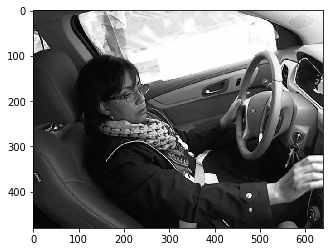

In [4]:
# Test class image for display.
test_array = []
for img in os.listdir(test_directory):
    img_array = cv2.imread(os.path.join(test_directory,img),cv2.IMREAD_GRAYSCALE)
    test_array = img_array
    plt.imshow(img_array, cmap='gray')
    plt.show()
    break

In [5]:
# checkking image size using shape.
print(img_array.shape)

(480, 640)


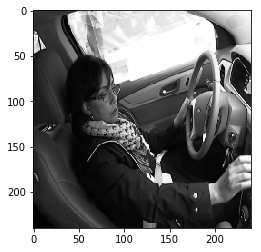

In [6]:
# trying out the resize image functionality
new_img = cv2.resize(test_array,(img_size,img_size))
plt.imshow(new_img,cmap='gray')
plt.show()

In [7]:
# Creating a test dataset.
testing_data = []
i = 0
def create_testing_data():        
    for img in os.listdir(test_directory):
        img_array = cv2.imread(os.path.join(test_directory,img),cv2.IMREAD_GRAYSCALE)
        new_img = cv2.resize(img_array,(img_size,img_size))
        testing_data.append([img,
            new_img])

In [8]:
create_testing_data()

In [9]:
print(len(testing_data))

79726


In [11]:
loaded_model = models.load_model(r"D:\Downloads\driverdistraction_lr_weights.h5")

Prediction Prob: [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
Predicted: 3


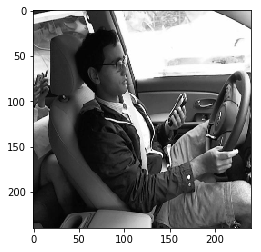

In [23]:
test_img=testing_data[8197][1]
test_data = np.array(test_img).reshape(-1,img_size,img_size,1)
preds = loaded_model.predict(test_data)
print('Prediction Prob: {}'.format(np.round(preds,decimals=3)))
print('Predicted: {}'.format(np.argmax(preds)))
new_img = cv2.resize(test_img,(img_size,img_size))
plt.imshow(new_img,cmap='gray')
plt.show()